<center><h1>TP 4 : Clustering de données</h1></center>

In [2]:
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
import random
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import time
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import csv
import pandas as pd
from sklearn.cluster import DBSCAN

# K-Moyennes :

In [3]:
def K_Means(X,k):
    max_iterations = 100
    tolerance_dist = 0.0001
    centroids = []
    
#     initialize the centroids randomly
    for i in range(k):
        centroids.append(random.choice(X))
        
    # check if iteretor in our range
    for j in range(max_iterations):
        pred_targets = np.zeros(len(X))          
        for x,i in zip(X,range(len(X))):
            distances = euclidean_distances(x.reshape(1,-1),centroids)
            pred_targets[i] = np.argmin(distances)
        #create centroids backup and void centroids list
        old_centroids = centroids
        centroids = []
        for z in range(k):
            if X[pred_targets == z].size == 0:
                #add backup centroids to centroids if the data of class z was empty to avoid some problems
                centroids.append(old_centroids[z])
            else:
                #average the cluster data points to re-calculate the new centroids
                centroids.append(np.average(X[pred_targets == z], axis = 0))
        #transfer list of centroids to array
        centroids = np.array(centroids)
        #check if the algorithm has reached the optimal values of centroids
        isOptimal = True
        for centroid,index in zip(centroids,range(len(centroids))):
            original_centroid = old_centroids[index]
            if abs(np.sum((centroid - original_centroid)/original_centroid * 10000.0)) > tolerance_dist:
                isOptimal = False
        #break out of the main loop if the results are optimal
        if isOptimal:
            break
    return np.array(pred_targets,dtype=int)

In [4]:
iris = datasets.load_iris()
features = iris.data
targets = iris.target

pred_targets = K_Means(features,3)
uni = np.unique(pred_targets)
list_pred_targets = list(pred_targets)
for i in range(len(uni)):
    print(f"number of elements in class {i} is : {list_pred_targets.count(uni[i])}")

number of elements in class 0 is : 50
number of elements in class 1 is : 39
number of elements in class 2 is : 61


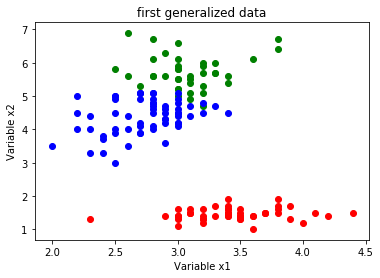

In [5]:
colors = ["r", "g", "b","y","black"]
plt.figure()
for i in range(3):
    plt.scatter(features[pred_targets == i, 1], features[pred_targets == i, 2], c=colors[i])
    plt.title('first generalized data')
    plt.xlabel('Variable x1')
    plt.ylabel('Variable x2')
plt.show()

In [6]:
range_n_clusters = [i for i in range(2,10)]
best_score = 0
for n_clusters in range_n_clusters:
    for j in range(10):
            preds = K_Means(features,n_clusters)
            score = silhouette_score (features, preds)
            if best_score < score:
                result = {'best':score,'k':n_clusters,'j':j}
                best_score = score
#             print (f"For n_clusters = {n_clusters}, in {j} time : silhouette score is {score}")
print (f"best score is {result['best']} with k = {result['k']} and j = {result['j']}")

best score is 0.681046169211746 with k = 2 and j = 0


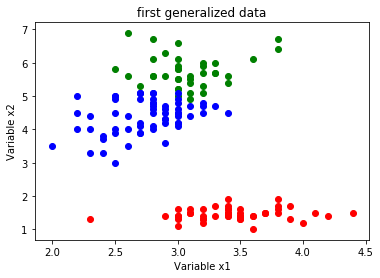

In [7]:
km = KMeans(n_clusters=3)
y_km = km.fit_predict(features)
for i in range(3):
    plt.scatter(features[y_km == i, 1], features[y_km == i, 2], c=colors[i])
    plt.title('first generalized data')
    plt.xlabel('Variable x1')
    plt.ylabel('Variable x2')
plt.show()

In [8]:
range_n_clusters = [i for i in range(2,10)]
for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(features)
    score = silhouette_score (features, preds, metric='euclidean')
    print (f"For n_clusters = {n_clusters}, time :silhouette score is {score}")

For n_clusters = 2, time :silhouette score is 0.681046169211746
For n_clusters = 3, time :silhouette score is 0.5528190123564091
For n_clusters = 4, time :silhouette score is 0.4980505049972867
For n_clusters = 5, time :silhouette score is 0.4887488870931048
For n_clusters = 6, time :silhouette score is 0.3648340039670018
For n_clusters = 7, time :silhouette score is 0.3571558397875374
For n_clusters = 8, time :silhouette score is 0.35745369258527043
For n_clusters = 9, time :silhouette score is 0.3263433133248599


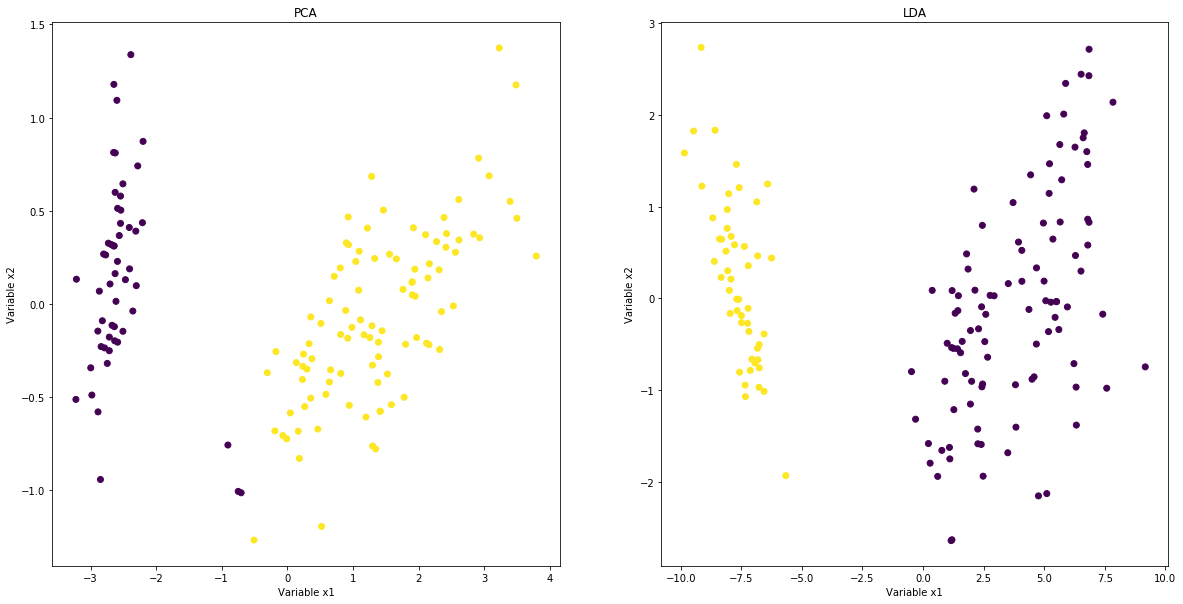

In [9]:
pca = PCA(2)
lda = LDA()
iris_pca = pca.fit_transform(features)
iris_lda = lda.fit_transform(features,targets)
km_1 = K_Means(iris_pca,2)
km_2 = K_Means(iris_lda,2)
# km_3 = km.fit_predict(iris_pca)
# print(iris_pca)

plt.subplots(1,2,figsize=(20,10))

plt.subplot(1,2,1)
plt.scatter(iris_pca[:,0], iris_pca[:,1], c=km_1)
plt.title('PCA')
plt.xlabel('Variable x1')
plt.ylabel('Variable x2')

plt.subplot(1,2,2)
plt.scatter(iris_lda[:,0], iris_lda[:,1], c=km_2)
plt.title('LDA')
plt.xlabel('Variable x1')
plt.ylabel('Variable x2')

plt.show()

In [10]:
csv_path = "choixprojetstab.csv"
df = pd.read_csv(csv_path,sep=';')
list_code = df[df.columns[0]].to_numpy()
matrix = df.drop(df.columns[0], axis=1).to_numpy()
matrix_pca = pca.fit_transform(matrix)
# print(list_code.shape)
# print(matrix)

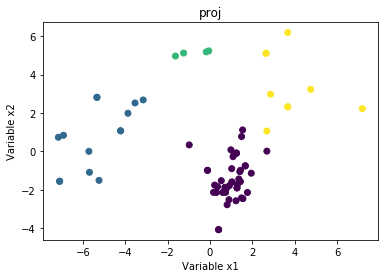

In [11]:
km_proj = KMeans(n_clusters=4)
pred = km_proj.fit_predict(matrix_pca)
# print(matrix_pca)
plt.scatter(matrix_pca[:,0], matrix_pca[:,1], c=pred)
plt.title('proj')
plt.xlabel('Variable x1')
plt.ylabel('Variable x2')
plt.show()

In [1]:
pred = K_Means(matrix_pca,4)
plt.scatter(matrix_pca[:,0], matrix_pca[:,1], c=pred)
plt.title('proj')
plt.xlabel('Variable x1')
plt.ylabel('Variable x2')
plt.show()

NameError: name 'K_Means' is not defined

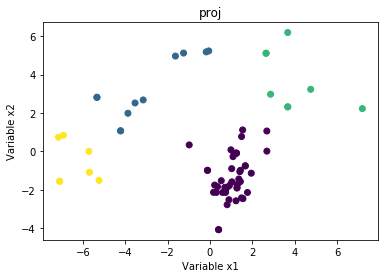

In [223]:
gmm = GaussianMixture(n_components=4)
pred = gmm.fit_predict(matrix_pca)
plt.scatter(matrix_pca[:,0], matrix_pca[:,1], c=pred)
plt.title('proj')
plt.xlabel('Variable x1')
plt.ylabel('Variable x2')
plt.show()